# Python Library Examples for Predicting and Fetching Chemical Properties

# 1. SMILES

SMILES (Simplified Molecular Input Line Entry System) is a text-based notation for representing chemical structures.

Atoms are denoted by their chemical symbols.

Bonds are represented as:

- single bond (often omitted)

- \= double bond

- \# triple bond

Branches are indicated using parentheses ().

Rings are represented by numbers connecting matching atoms.

**Examples:**

- Methanol: CO (hydroxyl on a single carbon)

- Ethanol: CCO (hydroxyl on a two-carbon chain)

- Isopropanol: CC(C)O (hydroxyl on a branched chain)

- Acetic acid: CC(=O)O (carboxyl group: carbonyl + hydroxyl)

- Acetone: CC(=O)C (carbonyl group in the middle: ketone)

- Carbon monoxide: C#O (triple bond between carbon and oxygen)

SMILES provides a compact, unambiguous way to encode molecules for databases, modeling, and property prediction.

# 2a. Using Smiles to define a compound

In [40]:
from rdkit import Chem
from rdkit.Chem import Descriptors

# 1. Define water using SMILES
water = Chem.MolFromSmiles("O")

# Calculate molar mass (molecular weight)
molar_mass = Descriptors.MolWt(water)

print(f"Water molar mass: {molar_mass:.2f} g/mol")


# 2. Define methanol using SMILES
methanol = Chem.MolFromSmiles("CO")

# Calculate molar mass (molecular weight)
molar_mass = Descriptors.MolWt(methanol)

print(f"Methanol molar mass: {molar_mass:.2f} g/mol")

# 3. Define NaCl using SMILES
nacl = Chem.MolFromSmiles("[Na+].[Cl-]")

# Calculate "molar mass"
molar_mass = Descriptors.MolWt(nacl)

print(f"NaCl molar mass: {molar_mass:.2f} g/mol")

# 4. Define calcium carbonate using SMILES
caco3 = Chem.MolFromSmiles("[Ca+2].[O-]C(=O)[O-].[O-]C(=O)[O-]")

# Calculate "molar mass"
molar_mass = Descriptors.MolWt(caco3)

print(f"Calcium carbonate molar mass: {molar_mass:.2f} g/mol")

Water molar mass: 18.02 g/mol
Methanol molar mass: 32.04 g/mol
NaCl molar mass: 58.44 g/mol
Calcium carbonate molar mass: 160.09 g/mol


# 2b. Defining chemical compounds using their molecular formulas with Chempy

In [39]:
#!pip install chempy

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.3/230.3 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.5 MB/s eta 0:00:00
  Created wheel for pyneqsys: filename=pyneqsys-0.5.7-py2.py3-none-any.whl size=27266 sha256=0ebc2103a5d697a2f3484e072ed2a7378881f4a67500e98d1f7e88a687ee6d24
  Stored in directory: /root/.cache/pip/wheels/08/b7/f0/7758574bed9afb4f51c2a92bce9dd8c40dc0a7aa7a78cf7b63
  Created wheel for pyodesys: filename=pyodesys-0.14.5-py2.py3-none-any.whl size=126359 sha256=9560cfebc68edd8cf630fbb3cdbbc7a4b254948e901b2d98b1d6b55758844846
  Stored in directory: /root/.cache/pip/wheels/80/c7/1

In [42]:
from chempy import Substance

# Methanol
methanol = Substance.from_formula('CH3OH')
print(f"Methanol molar mass: {methanol.molar_mass():.2f}")

# Sodium chloride
nacl = Substance.from_formula('NaCl')
print(f"NaCl molar mass: {nacl.molar_mass():.2f}")

# Calcium carbonate
caco3 = Substance.from_formula('CaCO3')
print(f"Calcium carbonate molar mass: {caco3.molar_mass():.2f}")


Methanol molar mass: 32.04 g/mol
NaCl molar mass: 58.44 g/mol
Calcium carbonate molar mass: 100.09 g/mol


# 3. Properties of alcohols

- Predicts properties from structure using RDKit.
- Predicts thermodynamic properties using Thermo’s group contribution methods.
- Fetches any available experimental data from PubChem.


In [19]:
#Install the required libraries
#!pip install rdkit
#!pip install thermo
#!pip install pubchempy
!pip install py3Dmol

       Name  MW_RDKit  logP_RDKit  BoilingPoint_Thermo(K)  \
0  methanol    32.042     -0.3915               81.638183   
1   ethanol    46.069     -0.0014              351.570442   
2  propanol    60.096      0.3887              370.190000   
3   butanol    74.123      0.7788              390.750000   
4  pentanol    88.150      1.1689              410.750000   
5   hexanol   102.177      1.5590              430.050000   
6  heptanol   116.204      1.9491              451.150000   
7   octanol   130.231      2.3392              467.850000   

   EnthalpyFormation_Thermo(kJ/mol)  CriticalTemp_Thermo(K) MW_PubChem  \
0                     -3.945898e+06                  132.86       None   
1                     -6.013444e+06                  514.71       None   
2                     -5.035359e+06                  536.80       None   
3                     -4.415717e+06                  563.00       None   
4                     -3.988738e+06                  588.10       None   
5     

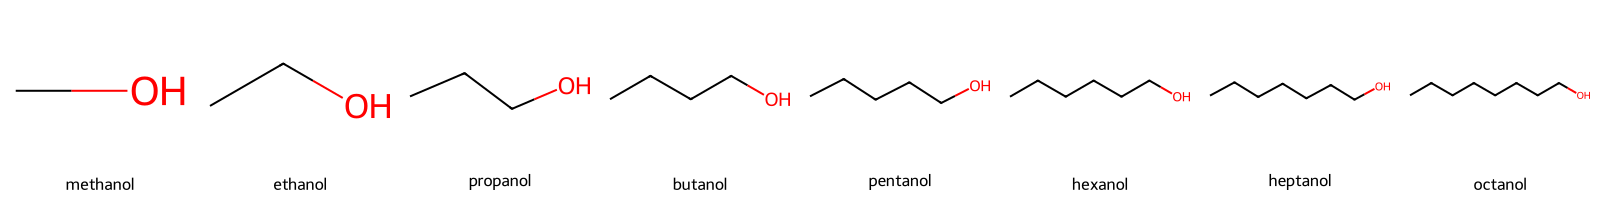

In [32]:
# alcohol_properties_with_thermo_pubchem.py
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw

import py3Dmol
import pandas as pd

# Optional: Thermo and PubChemPy for property prediction and database lookup
try:
    from thermo import Chemical
    thermo_available = True
except ImportError:
    thermo_available = False

try:
    import pubchempy as pcp
    pubchem_available = True
except ImportError:
    pubchem_available = False

# List of linear alcohols (name + SMILES)
alcohols = [
    {"name": "methanol", "smiles": "CO"},
    {"name": "ethanol", "smiles": "CCO"},
    {"name": "propanol", "smiles": "CCCO"},       # 1-propanol
    {"name": "butanol", "smiles": "CCCCO"},       # 1-butanol
    {"name": "pentanol", "smiles": "CCCCCO"},     # 1-pentanol
    {"name": "hexanol", "smiles": "CCCCCCO"},     # 1-hexanol
    {"name": "heptanol", "smiles": "CCCCCCCO"},   # 1-heptanol
    {"name": "octanol", "smiles": "CCCCCCCCO"}    # 1-octanol
]

results = []
mols_for_display = []

for compound in alcohols:
    name = compound["name"]
    smiles = compound["smiles"]

    # RDKit molecule
    mol = Chem.MolFromSmiles(smiles)
    mols_for_display.append(mol)

    # Molecular weight (MW) and logP from RDKit
    mol_wt = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)

    # Thermo predictions (if available)
    if thermo_available:
        try:
            chem = Chemical(smiles)
            Tb = chem.Tb                       # Boiling point (K)
            Hf = chem.Hf                       # Enthalpy of formation (kJ/mol)
            Tc = chem.Tc                       # Critical temperature (K)
        except:
            Tb, Hf, Tc = None, None, None
    else:
        Tb, Hf, Tc = None, None, None

    # PubChem lookup (if available)
    if pubchem_available:
        try:
            pc = pcp.get_compounds(name, 'name')[0]
            pc_mw = pc.molecular_weight
            pc_xlogp = pc.xlogp
            pc_bp = pc.boiling_point
        except:
            pc_mw, pc_xlogp, pc_bp = None, None, None
    else:
        pc_mw, pc_xlogp, pc_bp = None, None, None

    # Collect all properties into a dictionary
    results.append({
        "Name": name,
        "MW_RDKit": mol_wt,                          # Molecular weight from RDKit
        "logP_RDKit": logp,                          # logP (hydrophobicity) from RDKit
        "BoilingPoint_Thermo(K)": Tb,               # Boiling point estimated by Thermo
        "EnthalpyFormation_Thermo(kJ/mol)": Hf,    # Enthalpy of formation estimated by Thermo
        "CriticalTemp_Thermo(K)": Tc,              # Critical temperature estimated by Thermo
        "MW_PubChem": pc_mw,                         # Molecular weight from PubChem
        "XLogP_PubChem": pc_xlogp,                  # Predicted logP from PubChem
        "BoilingPoint_PubChem(K)": pc_bp            # Boiling point from PubChem
    })

# Convert results to a Pandas DataFrame and display
df = pd.DataFrame(results)
print(df)

# Display chemical structures in a grid with names as legends
Draw.MolsToImage(mols_for_display, legends=[c["name"] for c in alcohols], subImgSize=(200,200))

In [33]:
# Function to display a 3D ball-and-stick molecule
def show_3d(mol):
    # Add explicit hydrogens
    mol = Chem.AddHs(mol)

    # Generate 3D coordinates
    AllChem.EmbedMolecule(mol)

    # Convert to MolBlock for py3Dmol
    mb = Chem.MolToMolBlock(mol)

    # Display
    view = py3Dmol.view(width=300, height=300)
    view.addModel(mb, "mol")
    view.setStyle({'stick': {}, 'sphere': {'scale': 0.3}})
    view.zoomTo()
    return view

# Display each alcohol in 3D
for compound in alcohols:
    mol = Chem.MolFromSmiles(compound["smiles"])
    print(compound["name"])
    view = show_3d(mol)
    view.show()

methanol


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

ethanol


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

propanol


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

butanol


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

pentanol


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

hexanol


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

heptanol


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

octanol


3Dmol.js failed to load for some reason. Please check your browser console for error messages.